In [ ]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import datetime
import requests
import csv
from matplotlib import pyplot as plt

# File to Load 
wine_data = "Resources/Wine_Bottled_2019.csv"
per_capita = "Resources/per_capita_consumption_states_1977_2018_clean.csv"
population = "Resources/CDCPopulationGender.csv"

# Read Wine Production File and store into Pandas data frame
wine_data = pd.read_csv(wine_data)
wine_df = wine_data
wine_df.head(1000)

In [50]:
#month_group = effervescence_wine.groupby("Month")
month_group = wine_df.groupby(by=["State"]).describe()
month_group.head(10)

# of Bottled Still Wines                              \
                                        count          mean           std   
State                                                                       
Alabama                                  10.0  3.126500e+03  9.497652e+03   
Alaska                                   12.0  5.642833e+03  8.936453e+03   
Arizona                                   6.0  2.904217e+04  3.387549e+04   
Arkansas                                 12.0  2.020142e+04  1.140987e+04   
California                               12.0  3.865710e+07  1.707410e+07   
Colorado                                 12.0  6.248542e+04  4.999311e+04   
Connecticut                              12.0  1.514367e+04  3.229058e+04   
Delaware                                 11.0  2.136636e+03  3.347794e+03   
District of Columbia                      4.0  1.737175e+04  2.684190e+04   
Florida                                  12.0  2.617345e+05  1.500016e+05   

                                                                       \
                            min          25%         50%          75%   
State                                                                   
Alabama                     0.0         0.00        38.5       286.75   
Alaska                      0.0      1293.00      2877.0      6591.25   
Arizona                     0.0      2613.50     16334.0     51154.25   
Arkansas                 1190.0     10827.75     23472.0     28707.50   
California            3792417.0  35281166.00  44867714.0  49552470.50   
Colorado                20645.0     31540.75     39141.0     78820.25   
Connecticut              1183.0      1941.00      4014.5     11590.50   
Delaware                    0.0         0.00       558.0      2923.00   
District of Columbia        0.0      3750.75      6050.5     19671.50   
Florida                 42887.0    123243.50    270005.0    380949.75   

                                 # of Bottled Effervescence Wines  \
                             max                            count   
State                                                               
Alabama                  30153.0                             10.0   
Alaska                   32712.0                             12.0   
Arizona                  80784.0                              6.0   
Arkansas                 33890.0                             12.0   
California            54104222.0                             12.0   
Colorado                188854.0                             12.0   
Connecticut             116396.0                             12.0   
Delaware                 10276.0                             11.0   
District of Columbia     57386.0                              4.0   
Florida                 503733.0                             12.0   

                                    ...                        Year           \
                              mean  ...         75%        max count    mean   
State                               ...                                        
Alabama               2.000000e+01  ...        0.00      200.0  10.0  2019.0   
Alaska                5.958333e+02  ...      555.00     3526.0  12.0  2019.0   
Arizona               1.474833e+03  ...     2039.50     4809.0   6.0  2019.0   
Arkansas              2.280833e+02  ...        0.00     1584.0  12.0  2019.0   
California            1.674195e+06  ...  2581161.00  3648296.0  12.0  2019.0   
Colorado              3.831667e+02  ...      144.25     2628.0  12.0  2019.0   
Connecticut           3.703333e+02  ...        0.00     4444.0  12.0  2019.0   
Delaware              0.000000e+00  ...        0.00        0.0  11.0  2019.0   
District of Columbia  0.000000e+00  ...        0.00        0.0   4.0  2019.0   
Florida               4.975000e+02  ...      192.25     3536.0  12.0  2019.0   

                                                                   
                      std     min     25%     50%     75%     

In [20]:
# of Bottled Still Wines by state
bottled_wine = wine_df.copy()
bottled_wine.columns = ['State', 'Still', 'Effervescence', 'Month', 'Year']
#bottled_wine.reset_index(drop=True)
bt_wine_df = bottled_wine.drop(columns=['Year'])
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['January'], 'Jan')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['February'], 'Feb')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['March'], 'Mar')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['April'], 'Apr')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['May'], 'May')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['June'], 'Jun')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['July'], 'Jul')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['August'], 'Aug')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['September'], 'Sep')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['October'], 'Oct')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['November'], 'Nov')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['December'], 'Dec')
bt_wine_df["sMonth"] = pd.to_datetime(bt_wine_df.Month, format='%b', errors='coerce').dt.month
#bt_wine_df['Month'] = bt_wine_df['Month'].dt.strftime('%b') 
#bt_wine_df = bt_wine_df.sort_values(by="Month")
#bt_wine_df = bt_wine_df.set_index('sMonth').sort_index()
#bt_wine_df['Total'] = bt_wine_df.sum(axis=1)
bt_wine_df

,State,Still,Effervescence,Month,sMonth
0,Alabama,30153,200,Dec,12
1,Alaska,5247,0,Dec,12
2,Arizona,80784,2059,Dec,12
3,Arkansas,24197,0,Dec,12
4,California,39007466,1110404,Dec,12
...,...,...,...,...,...
540,Wisconsin,353647,496,Mar,3
541,Wisconsin,156990,0,May,5
542,Wisconsin,132404,1063,Nov,11
543,Wisconsin,257117,483,Oct,10


In [57]:
#month_group = effervescence_wine.groupby("Month")
bt_group = bt_wine_df.groupby(by=["Month"]).max()
bt_group.reset_index(drop=False)
bt_group.head(20)

,State,Still,Effervescence,sMonth
Month,,,,
Apr,Wisconsin,54104222,1325336,4
Aug,Wisconsin,24102266,23234,8
Dec,Wyoming,39007466,1110404,12
Feb,Wisconsin,43278480,2012923,2
Jan,Wisconsin,46393736,1703832,1
Jul,Wisconsin,49278825,2549382,7
Jun,Wisconsin,3792417,41858,6
Mar,Wisconsin,53093127,2058660,3
May,Wisconsin,8873643,43349,5


In [59]:
bt_group.plot.line()
plt.yticks((0, 54104222))
#plt.xticks((Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Aug, Sep, Oct, Nov, Dec))
plt.xticks((calendar.month_name[1:13], rotation=17))
#plt.xticks(arange(12), calendar.month_name[1:13], rotation=17 )
plt.show()


SyntaxError: invalid syntax (<ipython-input-59-2d627f72d512>, line 4)

In [7]:
#month_group = effervescence_wine.groupby("Month")
bt_wine_df.dtypes


State            object
Still             int64
Effervescence     int64
Month            object
sMonth            int64
dtype: object

In [8]:
wine_df.plot.scatter()
plt.show()


TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [29]:
bt_wine_gr = bt_wine_df.groupby(['sMonth','State','Month']).agg({'Still':sum, 'Effervescence':sum})
summary = bt_wine_gr.sort_index(level="sMonth")
summary

Still  Effervescence
sMonth State         Month                         
1      Alabama       Jan           0              0
       Alaska        Jan          15              0
       Arizona       Jan         755              0
       Arkansas      Jan       27395              0
       California    Jan    46393736        1703832
...                              ...            ...
12     Virginia      Dec      435094           6995
       Washington    Dec     2371015          34541
       West Virginia Dec       31440              0
       Wisconsin     Dec      318685           8658
       Wyoming       Dec        5598              0

[545 rows x 2 columns]

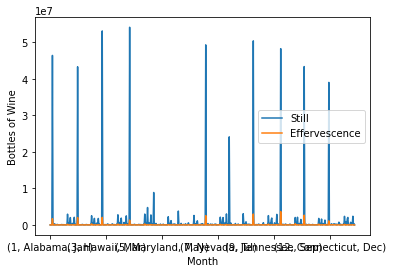

In [30]:
summary.plot.line()
plt.xlabel('Month')
plt.ylabel('Bottles of Wine')
plt.show()

In [31]:
bt_wine_gr_x = bt_wine_df.groupby(['Still','Effervescence']).agg({'Still':sum, 'Effervescence':sum})
summary_x = bt_wine_gr.sort_index(level="sMonth")
summary_x

Still  Effervescence
sMonth State         Month                         
1      Alabama       Jan           0              0
       Alaska        Jan          15              0
       Arizona       Jan         755              0
       Arkansas      Jan       27395              0
       California    Jan    46393736        1703832
...                              ...            ...
12     Virginia      Dec      435094           6995
       Washington    Dec     2371015          34541
       West Virginia Dec       31440              0
       Wisconsin     Dec      318685           8658
       Wyoming       Dec        5598              0

[545 rows x 2 columns]

NameError: name 'xticks' is not defined

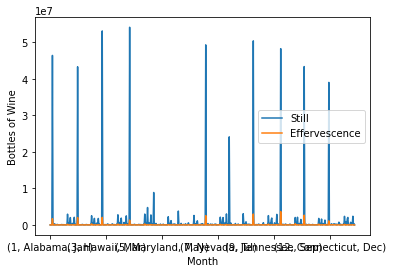

In [60]:
summary_x.plot.line()
plt.xlabel('Month')
plt.ylabel('Bottles of Wine')
locs, labels = xticks()
plt.show()